In [82]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

import matplotlib.pyplot as plt


In [11]:
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
dataset["DESCR"]


'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [15]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [22]:
dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
#just a comment, no offence intended

In [23]:
X.shape #.shape is an in-built variable within X. (X is the independent variable)

(150, 4)

In [24]:
len(X)

150

In [30]:
print(str(y.shape)+
"asd "+str(len(y)))# trying to add 2 integers and a string does not work, must convert numbers to string

(150,)asd 150


In [31]:
print(y.shape)
print(len(y))# str not required here because the print function automatically converts one line items to strings

(150,)
150


In [34]:
print(y.shape[0]+len(y)) #the 0 means ignore second element of y.shape in the operation

300


In [35]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
sum(X)

array([876.5, 458.1, 563.8, 179.8])

In [40]:
X.sum(axis=1) #summing across columns

array([10.2,  9.5,  9.4,  9.4, 10.2, 11.4,  9.7, 10.1,  8.9,  9.6, 10.8,
       10. ,  9.3,  8.5, 11.2, 12. , 11. , 10.3, 11.5, 10.7, 10.7, 10.7,
        9.4, 10.6, 10.3,  9.8, 10.4, 10.4, 10.2,  9.7,  9.7, 10.7, 10.9,
       11.3,  9.6,  9.6, 10.5,  9.6,  8.9, 10.2, 10.1,  8.4,  9.1, 10.7,
       11.2,  9.5, 10.7,  9.4, 10.7,  9.9, 16.3, 15.6, 16.4, 13.1, 15.4,
       14.3, 15.9, 11.6, 15.4, 13.2, 11.5, 14.6, 13.2, 15.1, 13.4, 15.6,
       14.6, 13.6, 14.4, 13.1, 15.7, 14.2, 15.2, 14.8, 14.9, 15.4, 15.8,
       16.4, 14.9, 12.8, 12.8, 12.6, 13.6, 15.4, 14.4, 15.5, 16. , 14.3,
       14. , 13.3, 13.7, 15.1, 13.6, 11.6, 13.8, 14.1, 14.1, 14.7, 11.7,
       13.9, 18.1, 15.5, 18.1, 16.6, 17.5, 19.3, 13.6, 18.3, 16.8, 19.4,
       16.8, 16.3, 17.4, 15.2, 16.1, 17.2, 16.8, 20.4, 19.5, 14.7, 18.1,
       15.3, 19.2, 15.7, 17.8, 18.2, 15.6, 15.8, 16.9, 17.6, 18.2, 20.1,
       17. , 15.7, 15.7, 19.1, 17.7, 16.8, 15.6, 17.5, 17.8, 17.4, 15.5,
       18.2, 18.2, 17.2, 15.7, 16.7, 17.3, 15.8])

In [41]:
X.sum(axis=0) #summing over rows

array([876.5, 458.1, 563.8, 179.8])

In [42]:
X.mean()

3.4636666666666662

In [43]:
X.mean(axis=0) #means by column

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [44]:
X.mean(axis=1)#means by row

array([2.55 , 2.375, 2.35 , 2.35 , 2.55 , 2.85 , 2.425, 2.525, 2.225,
       2.4  , 2.7  , 2.5  , 2.325, 2.125, 2.8  , 3.   , 2.75 , 2.575,
       2.875, 2.675, 2.675, 2.675, 2.35 , 2.65 , 2.575, 2.45 , 2.6  ,
       2.6  , 2.55 , 2.425, 2.425, 2.675, 2.725, 2.825, 2.4  , 2.4  ,
       2.625, 2.4  , 2.225, 2.55 , 2.525, 2.1  , 2.275, 2.675, 2.8  ,
       2.375, 2.675, 2.35 , 2.675, 2.475, 4.075, 3.9  , 4.1  , 3.275,
       3.85 , 3.575, 3.975, 2.9  , 3.85 , 3.3  , 2.875, 3.65 , 3.3  ,
       3.775, 3.35 , 3.9  , 3.65 , 3.4  , 3.6  , 3.275, 3.925, 3.55 ,
       3.8  , 3.7  , 3.725, 3.85 , 3.95 , 4.1  , 3.725, 3.2  , 3.2  ,
       3.15 , 3.4  , 3.85 , 3.6  , 3.875, 4.   , 3.575, 3.5  , 3.325,
       3.425, 3.775, 3.4  , 2.9  , 3.45 , 3.525, 3.525, 3.675, 2.925,
       3.475, 4.525, 3.875, 4.525, 4.15 , 4.375, 4.825, 3.4  , 4.575,
       4.2  , 4.85 , 4.2  , 4.075, 4.35 , 3.8  , 4.025, 4.3  , 4.2  ,
       5.1  , 4.875, 3.675, 4.525, 3.825, 4.8  , 3.925, 4.45 , 4.55 ,
       3.9  , 3.95 ,

In [47]:
y_pred = KMeans(n_clusters=3).fit_predict(X)



In [48]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [49]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
X_reduced = PCA(n_components=2).fit_transform(X)
pca = PCA(n_components=3)

pca_fit = pca.fit(X).transform(X)



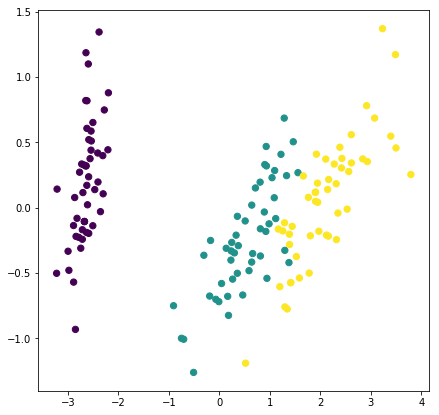

In [88]:
fig=plt.figure(figsize=[7,7]) #Creates an empty figure (plt=module which allows you to do plotting functions). 
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,  s=40)#c=colour paramter (ie. colouring is by y values) s=size paramter
#discrimination of clusters (flower colours) by pca

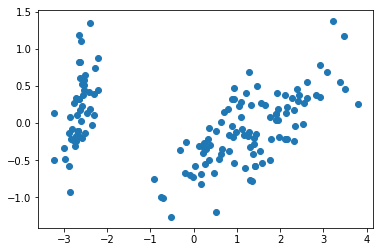

In [89]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1]) #a minimalistic version of the above plot


In [90]:
dataset["target_names"]#original target meaning

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# PCA plot

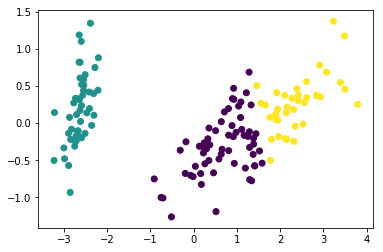

In [91]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred)#c=colour paramter (ie. colouring is by y values) s=size paramter
#predicted cluster membership using k means clustering approach, specifi=ying 3 clusters

In [92]:
loadings = pca.components_


In [93]:
loadings

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091]])

In [94]:
dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [95]:
loadings[0,].argmax()

2

In [96]:
dataset["feature_names"][loadings[0,].argmax()]

'petal length (cm)'

In [97]:
dataset["feature_names"][loadings[1,].argmax()]

'sepal width (cm)'

In [98]:
loadings.argmax(axis=1)#axis 1=by row

array([2, 1, 1])

In [99]:
#array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
#       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])
#row positions start from 0 therefore rowmaxes are 2 (PC1) and 1 (PC2)

In [100]:
feature_names = np.array(dataset["feature_names"])

In [101]:
feature_names[loadings.argmax(axis=1)]#axis 1=by row

array(['petal length (cm)', 'sepal width (cm)', 'sepal width (cm)'],
      dtype='<U17')